In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
def list_subfolders(directory):
    """
    List all subfolders in the given directory.

    :param directory: The directory to list subfolders from.
    :return: A list of names of all subfolders in the directory.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all entries in the directory
    entries = os.listdir(directory)

    # Filter out the entries that are folders
    folders = [entry for entry in entries if os.path.isdir(os.path.join(directory, entry))]

    return folders


def drop_row(df, row_index):
    """
    Drops the first row from a pandas DataFrame.

    :param df: A pandas DataFrame.
    :return: A DataFrame with the first row dropped.
    """
    # Drop the first row
    new_df = df.iloc[row_index:].reset_index(drop=True)
    return new_df


def read_csv_files(directory):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        if "observations" in csv_filename: continue
        dataframes[csv_filename] = drop_row(pd.read_csv(full_path), 1).set_index("trial")

    return dataframes

## Data Analysis for Myopic Experiments without Optimized Surrogate Per Iteration

In [19]:
dirname = "../experiments/myopic-shortrun-timing-with-kg/myopic_bayesopt/"
# dirname = "../experiments/adaptive-trial/adaptive_bayesopt/"
# Get the relative path to each test function's data from experiments
testfn_dirnames = [f"{dirname}{subdir}" for subdir in list_subfolders(dirname)]
# Create a mapping from test function to policy used to produce GAP data
myopic_experiments = dict()
for td in testfn_dirnames:
    # Read GAP data for current test function
    csv_data = read_csv_files(td)
    # Save gaps for EI, POI, UCB
    testfn = td.split("/")[-1]
    myopic_experiments[testfn] = csv_data
    # Save averages for each policy (EI, POI, UCB)

In [4]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []
kg_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    ei_mean_gaps.append(gaps_df["ei_gaps"].mean())
    poi_mean_gaps.append(gaps_df["poi_gaps"].mean())
    ucb_mean_gaps.append(gaps_df["ucb_gaps"].mean())
    kg_mean_gaps.append(gaps_df["kg_gaps"].mean())

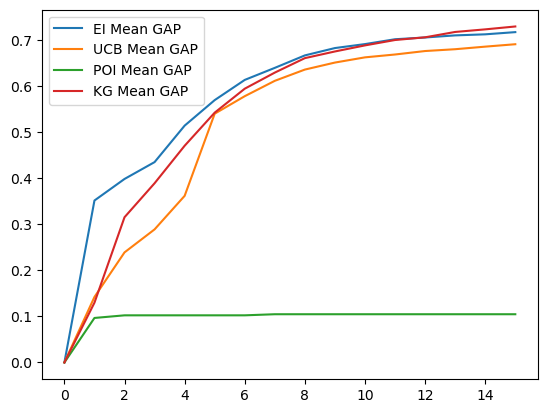

In [6]:
(sum(ei_mean_gaps) / len(ei_mean_gaps)).plot(label="EI Mean GAP")
(sum(ucb_mean_gaps) / len(ucb_mean_gaps)).plot(label="UCB Mean GAP")
(sum(poi_mean_gaps) / len(poi_mean_gaps)).plot(label="POI Mean GAP")
(sum(kg_mean_gaps) / len(kg_mean_gaps)).plot(label="KG Mean GAP")
plt.legend()

braninhoo dict_keys(['poi_gaps', 'ei_gaps', 'ei_times', 'random_gaps', 'random_times', 'ucb_times', 'kg_gaps', 'kg_times', 'poi_times', 'ucb_gaps'])


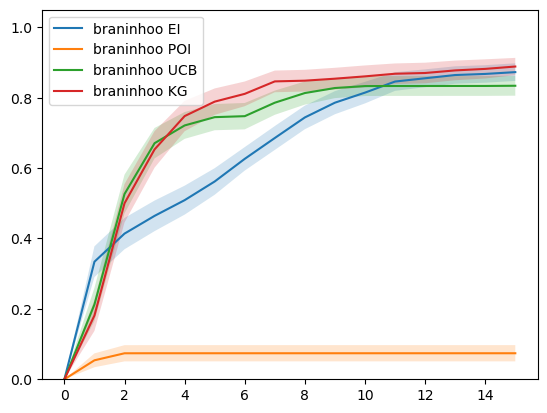

rosenbrock dict_keys(['poi_gaps', 'ei_gaps', 'ei_times', 'random_gaps', 'random_times', 'ucb_times', 'kg_gaps', 'kg_times', 'poi_times', 'ucb_gaps'])


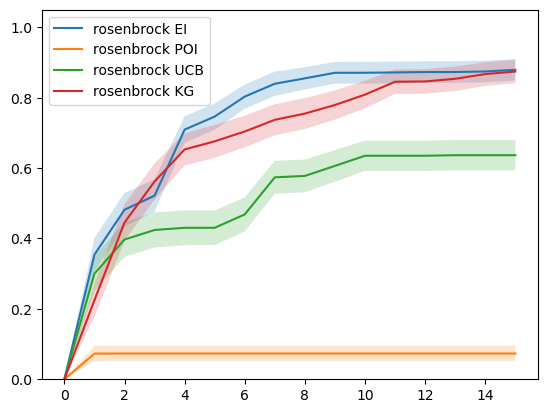

goldsteinprice dict_keys(['poi_gaps', 'ei_gaps', 'ei_times', 'random_gaps', 'random_times', 'ucb_times', 'kg_gaps', 'kg_times', 'poi_times', 'ucb_gaps'])


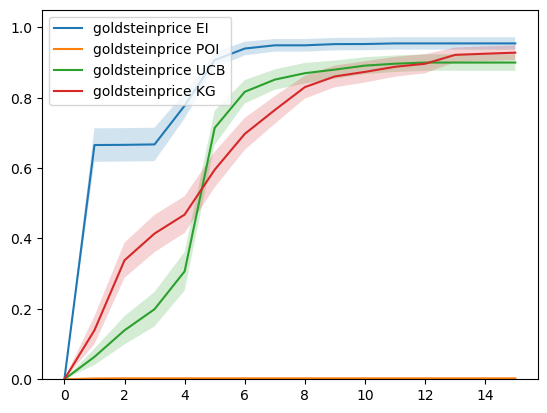

sixhump dict_keys(['poi_gaps', 'ei_gaps', 'ei_times', 'random_gaps', 'random_times', 'ucb_times', 'kg_gaps', 'kg_times', 'poi_times', 'ucb_gaps'])


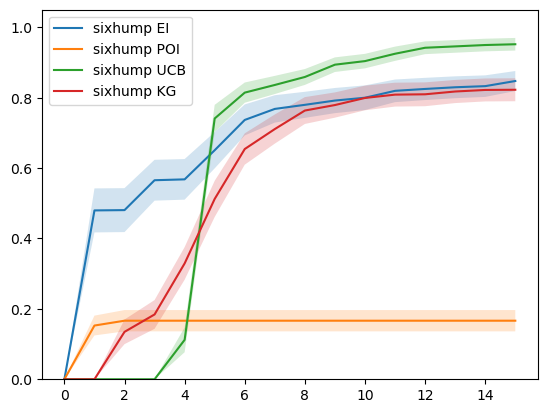

schwefel4d dict_keys(['poi_gaps', 'ei_gaps', 'ei_times', 'random_gaps', 'random_times', 'ucb_times', 'kg_gaps', 'kg_times', 'poi_times', 'ucb_gaps'])


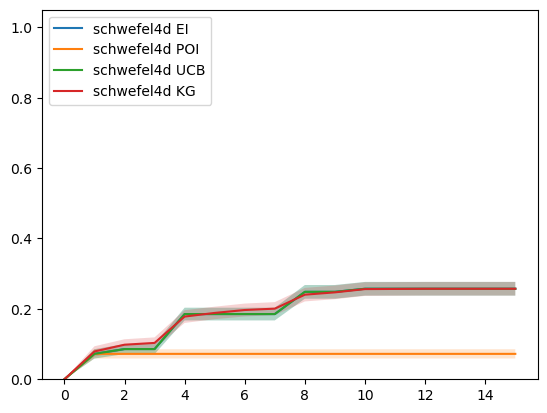

gramacylee dict_keys(['poi_gaps', 'ei_gaps', 'ei_times', 'random_gaps', 'random_times', 'ucb_times', 'kg_gaps', 'kg_times', 'poi_times', 'ucb_gaps'])


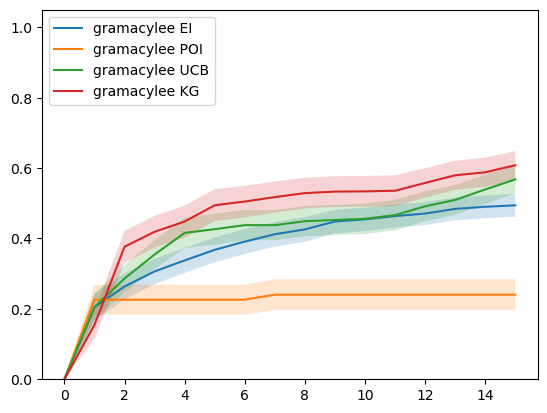

In [8]:
for testfn in myopic_experiments.keys():
    print(testfn, gaps_df.keys())
    myopic_gaps_df = myopic_experiments[testfn]
    x_values = range(len(myopic_gaps_df["ei_gaps"].mean()))
    
    gaps_mean = myopic_gaps_df["ei_gaps"].mean()
    sems = myopic_gaps_df["ei_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} EI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["poi_gaps"].mean()
    sems = myopic_gaps_df["poi_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} POI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["ucb_gaps"].mean()
    sems = myopic_gaps_df["ucb_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} UCB")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["kg_gaps"].mean()
    sems = myopic_gaps_df["kg_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} KG")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)

    plt.legend(loc="upper left")
    plt.ylim(0, 1.05)
    plt.show()

## Data Analysis for Non-Myopic Experiments without Optimized Surrogate Per Iteration

In [9]:
def read_csv_files_nonmyopic(directory, get_observations=True):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]
    if get_observations:
        csv_files = [f for f in csv_files if "observation" in f]
    else:
        csv_files = [f for f in csv_files if "observation" not in f]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        print(full_path)
        dataframes[csv_filename] = drop_first_row(pd.read_csv(full_path)).set_index("trial")

    return dataframes

def read_csv_files_nonmyopic2(directory, get_observations=True):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]
    if get_observations:
        csv_files = [f for f in csv_files if "observation" in f]
    else:
        csv_files = [f for f in csv_files if "observation" not in f]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        # print(full_path)
        dataframes[csv_filename] = pd.read_csv(full_path, skiprows=2, header=None)

    return dataframes

In [29]:
# dirname = "../experiments/no-truncated-horizons/nonmyopic_bayesopt/"
# dirname = "../experiments/longrun-bayesopt/nonmyopic_bayesopt/"
dirname = "../experiments/adaptive-trial/adaptive_bayesopt/"

# Get the relative path to each test function's data from experiments
testfn_dirnames = [f"{dirname}{subdir}" for subdir in list_subfolders(dirname)]

# Create a mapping from test function to policy used to produce GAP data
nonmyopic_experiments = dict()
# for td in [testfn_dirnames[1], testfn_dirnames[6]]:
for td in testfn_dirnames:
    try:
        # Read GAP data for current test function
        csv_data = read_csv_files_nonmyopic2(td, get_observations=False)
        # Save gaps for horizons 0 and 1
        testfn = td.split("/")[-1]
        nonmyopic_experiments[testfn] = csv_data
    except:
        print(f"{td} still running...")

### Gather Median GAP

schwefel4d
Rollout H1
Mean and Median: 0.401 -- 0.411


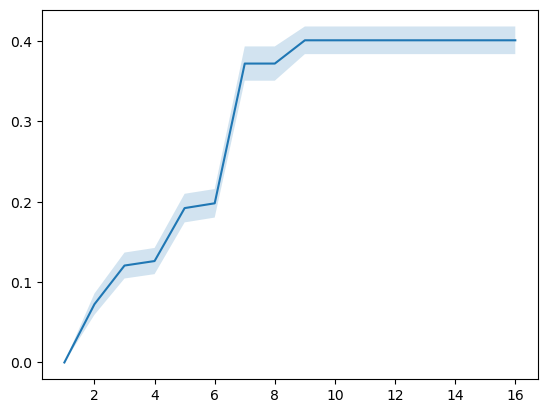

In [31]:
strategies = ["POI", "EI", "UCB", "h=0", "h=1", "h=2", "h=3"]
strategy_counts = {strat: 0 for strat in strategies}

# for testfn in nonmyopic_experiments.keys():
for testfn in nonmyopic_experiments.keys():
    try:
        print(testfn)
        myopic_gaps_df = myopic_experiments[testfn]
        nonmyopic_gaps_df = nonmyopic_experiments[testfn]
        x_values = range(1, len(nonmyopic_gaps_df["rollout_h1_gaps"].mean()))
        # last_mean = []

        # gaps_mean = myopic_gaps_df["random_gaps"].mean()
        # print(f"Random")
        # print(f"Mean and Median: {myopic_gaps_df['random_gaps'].mean()[-1]:.3f} -- {myopic_gaps_df['random_gaps'].median()[-1]:.3f}")
        # sems = myopic_gaps_df["ucb_gaps"].sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} Random")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)

        # gaps_mean = myopic_gaps_df["poi_gaps"].mean()
        # print(f"Probability of Improvement")
        # print(f"Mean and Median: {myopic_gaps_df['poi_gaps'].mean()[-1]:.3f} -- {myopic_gaps_df['poi_gaps'].median()[-1]:.3f}")
        # sems = myopic_gaps_df["poi_gaps"].sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} POI")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        # gaps_mean = myopic_gaps_df["ei_gaps"].mean()
        # print(f"Expected Improvement")
        # print(f"Mean and Median: {myopic_gaps_df['ei_gaps'].mean()[-1]:.3f} -- {myopic_gaps_df['ei_gaps'].median()[-1]:.3f}")
        # sems = myopic_gaps_df["ei_gaps"].sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} EI")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        # gaps_mean = myopic_gaps_df["ucb_gaps"].mean()
        # print(f"UCB")
        # print(f"Mean and Median: {myopic_gaps_df['ucb_gaps'].mean()[-1]:.3f} -- {myopic_gaps_df['ucb_gaps'].median()[-1]:.3f}")
        # sems = myopic_gaps_df["ucb_gaps"].sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} UCB")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])
        
        # gaps_mean = myopic_gaps_df["kg_gaps"].mean()
        # print(f"KG")
        # print(f"Mean and Median: {myopic_gaps_df['kg_gaps'].mean()[-1]:.3f} -- {myopic_gaps_df['kg_gaps'].median()[-1]:.3f}")
        # sems = myopic_gaps_df["ucb_gaps"].sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} UCB")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        # gaps_mean = nonmyopic_gaps_df["rollout_h0_gaps"].drop(columns=0).mean()
        # print(f"Rollout H0")
        # print(f"Mean and Median: {nonmyopic_gaps_df['rollout_h0_gaps'].mean().values[-1]:.3f} -- {nonmyopic_gaps_df['rollout_h0_gaps'].median().values[-1]:.3f}")
        # sems = nonmyopic_gaps_df["rollout_h0_gaps"].drop(columns=0).sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h0")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        gaps_mean = nonmyopic_gaps_df["rollout_h1_gaps"].drop(columns=0).mean()
        print(f"Rollout H1")
        print(f"Mean and Median: {nonmyopic_gaps_df['rollout_h1_gaps'].mean().values[-1]:.3f} -- {nonmyopic_gaps_df['rollout_h1_gaps'].median().values[-1]:.3f}")
        sems = nonmyopic_gaps_df["rollout_h1_gaps"].drop(columns=0).sem()
        plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h1")
        plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        # gaps_mean = nonmyopic_gaps_df["rollout_h2_gaps"].drop(columns=0).mean()
        # print(f"Rollout H2")
        # print(f"Mean and Median: {nonmyopic_gaps_df['rollout_h2_gaps'].mean().values[-1]:.3f} -- {nonmyopic_gaps_df['rollout_h2_gaps'].median().values[-1]:.3f}")
        # sems = nonmyopic_gaps_df["rollout_h2_gaps"].drop(columns=0).sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h2")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        # gaps_mean = nonmyopic_gaps_df["rollout_h3_gaps"].drop(columns=0).mean()
        # print(f"Rollout H3")
        # print(f"Mean and Median: {nonmyopic_gaps_df['rollout_h3_gaps'].mean().values[-1]:.3f} -- {nonmyopic_gaps_df['rollout_h3_gaps'].median().values[-1]:.3f}")
        # sems = nonmyopic_gaps_df["rollout_h3_gaps"].drop(columns=0).sem()
        # plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h3")
        # plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
        # last_mean.append(gaps_mean.values[-1])

        # max_value = max(last_mean)
        # max_index = last_mean.index(max_value)
        # strategy_counts[strategies[max_index]] += 1
        # print(f"Best Strategy Index: {max_index} -- Gap: {last_mean[max_index]:.3f}")
    except:
        pass
    # plt.legend(loc="upper left")
    # plt.ylim(0, 1)
    # plt.show()

In [327]:
strategy_counts

{'POI': 3, 'EI': 3, 'UCB': 1, 'h=0': 3, 'h=1': 0, 'h=2': 2, 'h=3': 3}

In [328]:
strategy_counts2 = dict()
strategy_counts2["Myopic"] = strategy_counts["POI"] + strategy_counts["EI"] + strategy_counts["UCB"]
strategy_counts2["Nonmyopic"] = sum(strategy_counts.values()) - strategy_counts2["Myopic"]

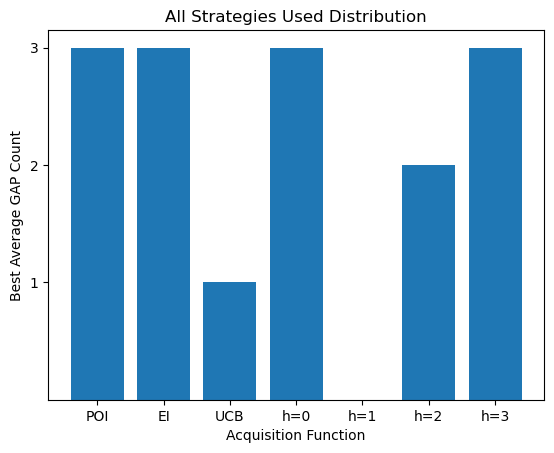

In [329]:
# Example dictionary
data = strategy_counts

# Extracting names and values
names = list(data.keys())
values = list(data.values())

# Creating the histogram
plt.bar(names, values)

# Adding titles and labels
plt.yticks(np.arange(1, max(values)+1, 1.0))
plt.xlabel('Acquisition Function')
plt.ylabel('Best Average GAP Count')
plt.title('All Strategies Used Distribution')

# Display the histogram
plt.savefig("all_strategy_distribution.png")

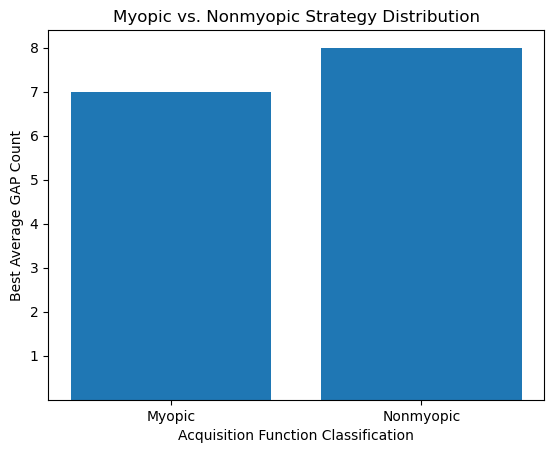

In [330]:
# Example dictionary
data = strategy_counts2

# Extracting names and values
names = list(data.keys())
values = list(data.values())

# Creating the histogram
plt.bar(names, values)

# Adding titles and labels
plt.yticks(np.arange(1, max(values)+1, 1.0))
plt.xlabel('Acquisition Function Classification')
plt.ylabel('Best Average GAP Count')
plt.title('Myopic vs. Nonmyopic Strategy Distribution')

# Display the histogram
plt.savefig("myopic_vs_nonmyopic_distribution.png")

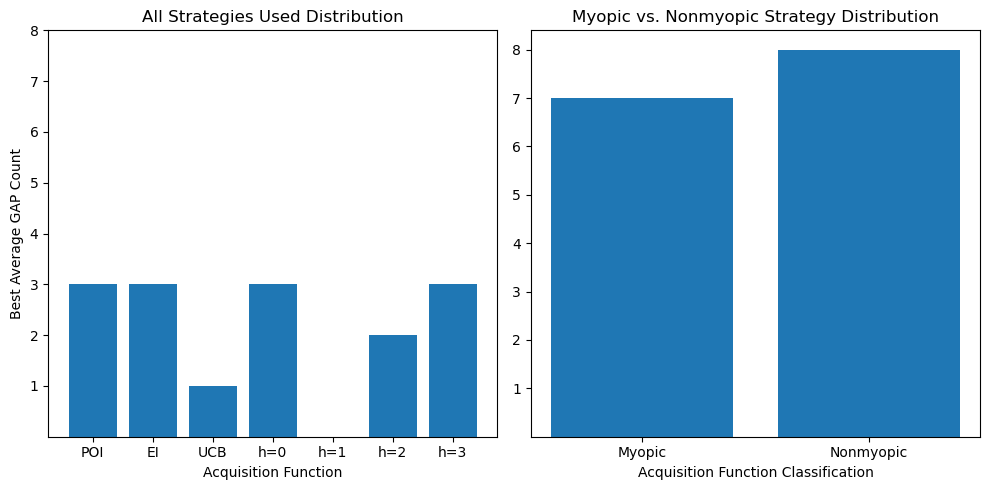

In [335]:
# First plot data
names1 = list(strategy_counts.keys())
values1 = list(strategy_counts.values())

# Second plot data
names2 = list(strategy_counts2.keys())
values2 = list(strategy_counts2.values())

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the first histogram
ax1.bar(names1, values1)
ax1.set_yticks(np.arange(1, max(values2)+1, 1.0))
ax1.set_xlabel('Acquisition Function')
ax1.set_ylabel('Best Average GAP Count')
ax1.set_title('All Strategies Used Distribution')

# Plotting the second histogram
ax2.bar(names2, values2)
ax2.set_yticks(np.arange(1, max(values2)+1, 1.0))
ax2.set_xlabel('Acquisition Function Classification')
# ax2.set_ylabel('Best Average GAP Count')
ax2.set_title('Myopic vs. Nonmyopic Strategy Distribution')

# Display the histograms side by side
plt.tight_layout()
plt.savefig("side_by_side_distributions.png")


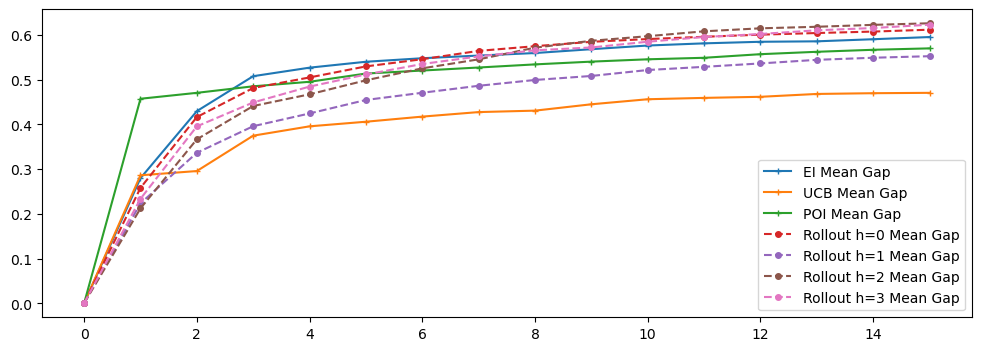

In [300]:
import scipy

ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []
hh = 4
rollout_gaps = [[] for _ in range(hh)]
medians = dict()

# gaps_mean = myopic_gaps_df["ei_gaps"].mean()
# print(f"Expected Improvement")
# print(f"Mean and Median: {myopic_gaps_df['ei_gaps'].mean()[-1]:.3f} -- {myopic_gaps_df['ei_gaps'].median()[-1]:.3f}")
# sems = myopic_gaps_df["ei_gaps"].sem()
# plt.plot(x_values, gaps_mean, label=f"{testfn} EI")
# plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
# last_mean.append(gaps_mean.values[-1])
plt.figure(figsize=(12, 4))
# Gather each mean respectively for each test function
for testfn, gaps_df in myopic_experiments.items():
    ei_mean_gaps.append(gaps_df["ei_gaps"].mean())
    poi_mean_gaps.append(gaps_df["poi_gaps"].mean())
    ucb_mean_gaps.append(gaps_df["ucb_gaps"].mean())
    
    medians["ei"] = gaps_df["ei_gaps"].median().values[-1]
    medians["poi"] = gaps_df["poi_gaps"].median().values[-1]
    medians["ucb"] = gaps_df["ucb_gaps"].median().values[-1]

# Gather each mean respectively
for testfn, gaps_df in nonmyopic_experiments.items():
    for ndx in range(hh):
        rollout_gaps[ndx].append(gaps_df[f"rollout_h{ndx}_gaps"].drop(columns=0).mean())
        medians[f"rollout_h{ndx}"] = gaps_df[f"rollout_h{ndx}_gaps"].median().values[-1]
        

xvalues = range(16)
gaps_mean = np.mean(ei_mean_gaps, axis=0)
sems = scipy.stats.sem(ei_mean_gaps, axis=0)
plt.plot(xvalues, gaps_mean, label="EI Mean Gap", markersize=4, marker="+")
# plt.fill_between(xvalues, gaps_mean - sems, gaps_mean + sems, alpha=.1)

gaps_mean = np.mean(ucb_mean_gaps, axis=0)
sems = scipy.stats.sem(ei_mean_gaps, axis=0)
plt.plot(xvalues, gaps_mean, label="UCB Mean Gap", markersize=4, marker="+")
# plt.fill_between(xvalues, gaps_mean - sems, gaps_mean + sems, alpha=.1)

gaps_mean = np.mean(poi_mean_gaps, axis=0)
sems = scipy.stats.sem(ei_mean_gaps, axis=0)
plt.plot(xvalues, gaps_mean, label="POI Mean Gap", markersize=4, marker="+")
# plt.fill_between(xvalues, gaps_mean - sems, gaps_mean + sems, alpha=.1)

for ndx, rgap in enumerate(rollout_gaps):
    gaps_mean = np.mean(rgap, axis=0)
    sems = scipy.stats.sem(ei_mean_gaps, axis=0)
    plt.plot(xvalues, gaps_mean, label=f"Rollout h={ndx} Mean Gap", linestyle="--", marker="o", markersize=4)
    # plt.fill_between(xvalues, gaps_mean - sems, gaps_mean + sems, alpha=.1)
# (sum(ei_mean_gaps) / len(ei_mean_gaps)).plot(label="EI Mean GAP")
# (sum(ucb_mean_gaps) / len(ucb_mean_gaps)).plot(label="UCB Mean GAP")
# (sum(poi_mean_gaps) / len(poi_mean_gaps)).plot(label="POI Mean GAP")
# for ndx, rgap in enumerate(rollout_gaps):
#     (sum(rgap) / len(rgap)).plot(label=f"Rollout h={ndx} Mean Gap")
plt.legend()
plt.savefig("average_gap_various_strategies_no_sem.png")

In [301]:
medians

{'ei': 0.3749515620371552,
 'poi': 0.2106577037333613,
 'ucb': 0.32992054938977855,
 'rollout_h0': 0.1442632909826343,
 'rollout_h1': 0.3028454308818045,
 'rollout_h2': 0.2007589453280282,
 'rollout_h3': 0.33255342316769354}

# Gather Time

KeyError: 'rollout_h1_times'

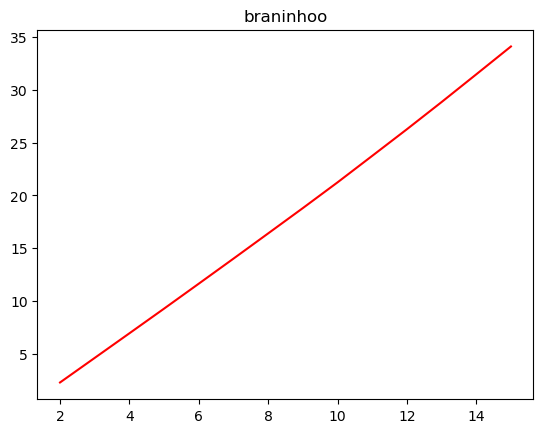

In [240]:
htimes = []
x_values = None
colors = ["r", "g", "m", "b"]
linestyles = ["solid", "dotted"]


for ndx, testfn in enumerate(nonmyopic_experiments.keys()):
    plt.title(testfn)
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    x_values = range(len(nonmyopic_gaps_df["rollout_h0_times"].mean()))[2:16]
    
    times_mean = nonmyopic_gaps_df["rollout_h0_times"].mean()[2:16]
    htimes.append(times_mean.values)
    sems = nonmyopic_gaps_df["rollout_h0_times"].sem()[2:16]
    plt.plot(x_values, np.cumsum(times_mean), label=f"h=1", color=colors[0])#, linestyle=linestyles[ndx])
    # plt.fill_between(x_values, times_mean - sems, times_mean + sems, alpha=0.2)
    
    times_mean = nonmyopic_gaps_df["rollout_h1_times"].mean()[2:16]
    htimes.append(times_mean.values)
    sems = nonmyopic_gaps_df["rollout_h1_times"].sem()[2:16]
    plt.plot(x_values, np.cumsum(times_mean), label=f"h=2", color=colors[1])#, linestyle=linestyles[ndx])
    # plt.fill_between(x_values, times_mean - sems, times_mean + sems, alpha=0.2)
    
    times_mean = nonmyopic_gaps_df["rollout_h2_times"].mean()[2:16]
    htimes.append(times_mean.values)
    sems = nonmyopic_gaps_df["rollout_h2_times"].sem()[2:16]
    plt.plot(x_values, np.cumsum(times_mean), label=f"h=3", color=colors[2])#, linestyle=linestyles[ndx])
    # plt.fill_between(x_values, times_mean - sems, times_mean + sems, alpha=0.2)
    
    times_mean = nonmyopic_gaps_df["rollout_h3_times"].mean()[2:16]
    htimes.append(times_mean.values)
    sems = nonmyopic_gaps_df["rollout_h3_times"].sem()[2:16]
    plt.plot(x_values, np.cumsum(times_mean), label=f"h=4", color=colors[3])#, linestyle=linestyles[ndx])
    # plt.fill_between(x_values, times_mean - sems, times_mean + sems, alpha=0.2)
    
    plt.legend(loc="upper left")
    # plt.ylim(0, 1)
    plt.show()

In [241]:
ps = [np.poly1d(np.polyfit(x_values, ht, deg=2)) for ht in htimes]
[print(p) for p in ps]

          2
0.001868 x - 0.005199 x + 2.315


[None]

In [242]:
# Ratios to h0
ratios = []

for i in range(len(htimes) - 1):
    longer_horizon = htimes[i + 1]
    shorter_horizon = htimes[0]
    ratios.append(longer_horizon / shorter_horizon)

In [243]:
rps = [np.poly1d(np.polyfit(x_values, ht, deg=1)) for ht in ratios]
[print(p) for p in rps]

[]

In [244]:
plt.plot(ratios[0], label="h2/h1", color=colors[1])
plt.plot(ratios[1], label="h3/h1", color=colors[2])
plt.plot(ratios[2], label="h4/h1", color=colors[3])

plt.xlabel("Budget")  # Label for the x-axis
plt.ylabel("Time (seconds)")  # Label for the y-axis
plt.title("Multiplicative Cost of Looking Further Ahead")    # Title of the plot
plt.legend()
# plt.show()
plt.savefig("multiplicative_cost.png")

IndexError: list index out of range

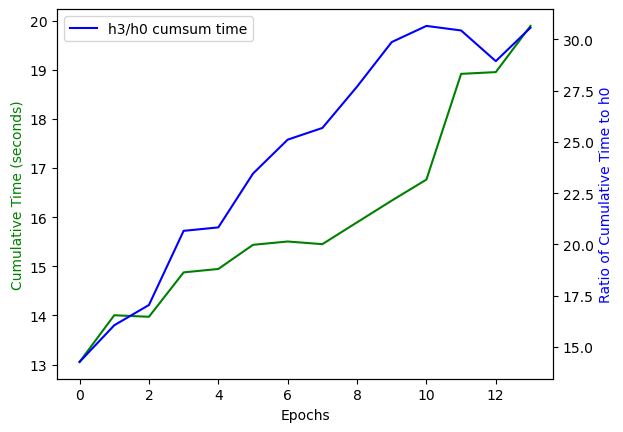

In [225]:
# Look at the plots for the ratios of time and accumulation of time on the same plot
# The code to produce the same plot as shown above is as follows:
# Generating sample data
domain = np.arange(0, htimes[0].shape[0])  # 100 points from 0 to 10
y1 = htimes[3]  # Exponential function
y2 = ratios[2]  # Logarithmic function, adding 1 to avoid log(0)

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plotting the exponential function on the first y-axis (left side)
ax1.plot(domain, y1, "g-", label="h3 cumsum time")  # 'g-' denotes green solid line
ax1.set_xlabel("Epochs")  # Label for x-axis
ax1.set_ylabel("Cumulative Time (seconds)", color="g")  # Label for left y-axis in green color

# Creating a second y-axis (right side) sharing the same x-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(domain, y2, "b-", label="h3/h0 cumsum time")  # 'b-' denotes blue solid line
ax2.set_ylabel("Ratio of Cumulative Time to h0", color="b")  # Label for right y-axis in blue color

# # Adding a title to the plot
# plt.title("Dual Y-Axis Plot")

# Display the plot
plt.legend()
plt.show()


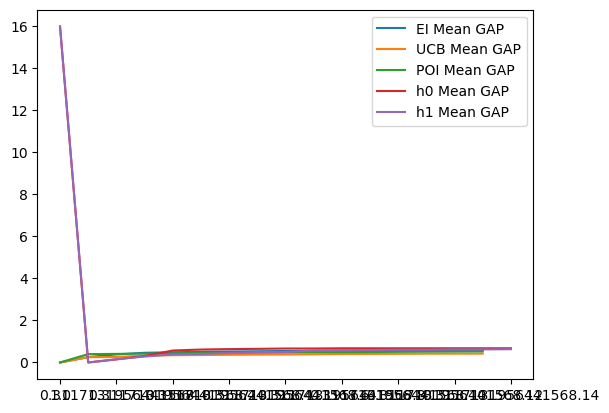

In [63]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    ei_mean_gaps.append(gaps_df["ei_gaps"].mean())
    poi_mean_gaps.append(gaps_df["poi_gaps"].mean())
    ucb_mean_gaps.append(gaps_df["ucb_gaps"].mean())

h0_mean_gaps = []
h1_mean_gaps = []

for testfn, gaps_df in nonmyopic_experiments.items():
    h0_mean_gaps.append(gaps_df["rollout_h0_gaps"].mean())
    h1_mean_gaps.append(gaps_df["rollout_h1_gaps"].mean())
    
(sum(ei_mean_gaps) / len(ei_mean_gaps)).plot(label="EI Mean GAP")
(sum(ucb_mean_gaps) / len(ucb_mean_gaps)).plot(label="UCB Mean GAP")
(sum(poi_mean_gaps) / len(poi_mean_gaps)).plot(label="POI Mean GAP")
(sum(h0_mean_gaps) / len(h0_mean_gaps)).plot(label="h0 Mean GAP")
(sum(h1_mean_gaps) / len(h1_mean_gaps)).plot(label="h1 Mean GAP")
plt.legend()

In [43]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    myopic_gaps_df = myopic_experiments[testfn]
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    means = [
        myopic_gaps_df["ei_gaps"].mean()[-1],
        myopic_gaps_df["ucb_gaps"].mean()[-1],
        myopic_gaps_df["poi_gaps"].mean()[-1],
        nonmyopic_gaps_df["rollout_h0_gaps"].mean()[-1],
        nonmyopic_gaps_df["rollout_h1_gaps"].mean()[-1]
    ]
    medians = [
        myopic_gaps_df["ei_gaps"].median()[-1],
        myopic_gaps_df["ucb_gaps"].median()[-1],
        myopic_gaps_df["poi_gaps"].median()[-1],
        nonmyopic_gaps_df["rollout_h0_gaps"].median()[-1],
        nonmyopic_gaps_df["rollout_h1_gaps"].median()[-1]
    ]
    print(f"Test Function: {testfn}")
    print(f"EI -> Mean: {means[0]:.2f} -- Median: {medians[0]:.2f}")
    print(f"UCB -> Mean: {means[1]:.2f} -- Median: {medians[1]:.2f}")
    print(f"POI -> Mean: {means[2]:.2f} -- Median: {medians[2]:.2f}")
    print(f"H0 -> Mean: {means[3]:.2f} -- Median: {medians[3]:.2f}")
    print(f"H1 -> Mean: {means[4]:.2f} -- Median: {medians[4]:.2f}\n")

# h0_mean_gaps = []
# h1_mean_gaps = []

# for testfn, gaps_df in nonmyopic_experiments.items():
#     h0_mean_gaps.append(gaps_df["rollout_h0_gaps"].mean())
#     h1_mean_gaps.append(gaps_df["rollout_h1_gaps"].mean())

Test Function: rosenbrock
EI -> Mean: 0.50 -- Median: 0.59
UCB -> Mean: 0.40 -- Median: 0.15
POI -> Mean: 0.66 -- Median: 0.92
H0 -> Mean: 0.49 -- Median: 0.58
H1 -> Mean: 0.88 -- Median: 0.99

Test Function: bukinn6
EI -> Mean: 0.35 -- Median: 0.39
UCB -> Mean: 0.24 -- Median: 0.18
POI -> Mean: 0.31 -- Median: 0.34
H0 -> Mean: 0.43 -- Median: 0.50
H1 -> Mean: 0.49 -- Median: 0.52

Test Function: eggholder
EI -> Mean: 0.22 -- Median: 0.21
UCB -> Mean: 0.32 -- Median: 0.47
POI -> Mean: 0.12 -- Median: 0.08
H0 -> Mean: 0.31 -- Median: 0.47
H1 -> Mean: 0.30 -- Median: 0.40

Test Function: holdertable
EI -> Mean: 0.75 -- Median: 0.77
UCB -> Mean: 0.74 -- Median: 0.77
POI -> Mean: 0.63 -- Median: 0.76
H0 -> Mean: 0.75 -- Median: 0.78
H1 -> Mean: 0.78 -- Median: 0.79

Test Function: styblinskitang2d
EI -> Mean: 0.53 -- Median: 0.57
UCB -> Mean: 0.11 -- Median: 0.00
POI -> Mean: 0.67 -- Median: 0.72
H0 -> Mean: 0.63 -- Median: 0.75
H1 -> Mean: 0.78 -- Median: 0.89

Test Function: braninhoo
EI

rosenbrock


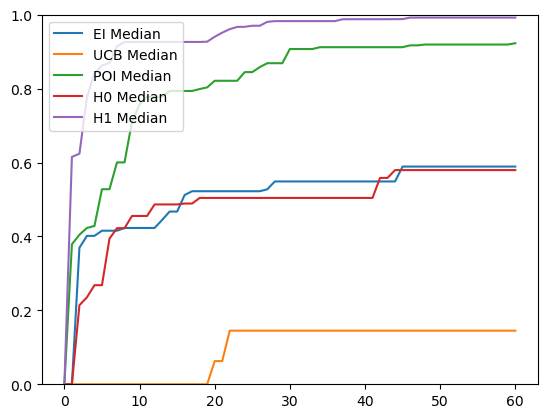

bukinn6


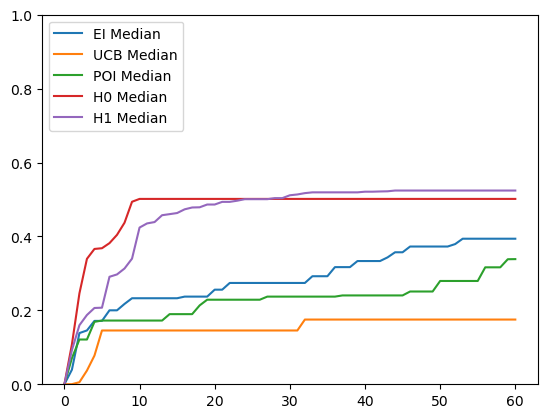

eggholder


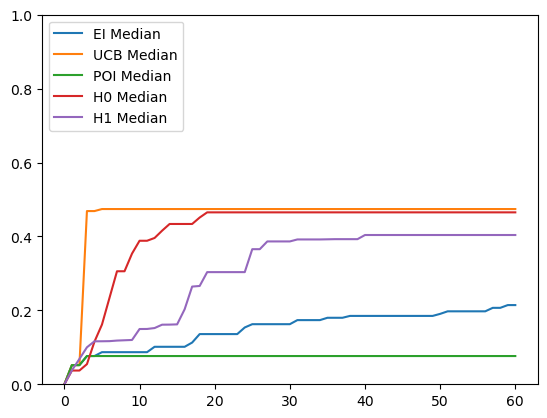

holdertable


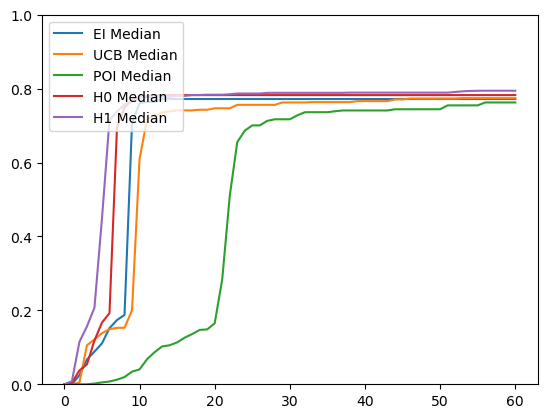

styblinskitang2d


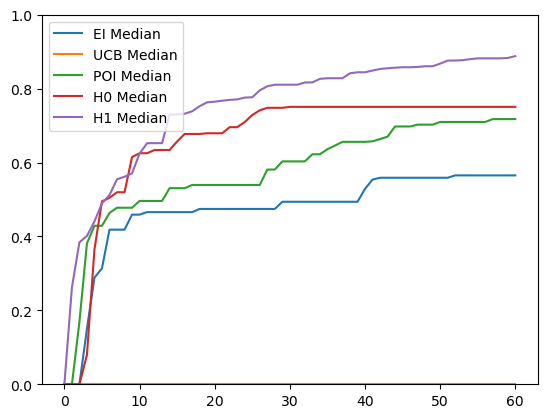

braninhoo


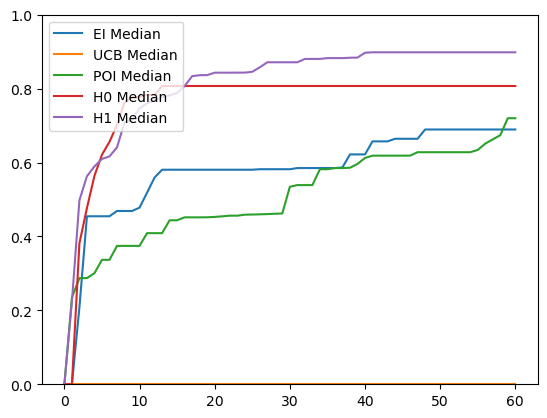

schwefel3d


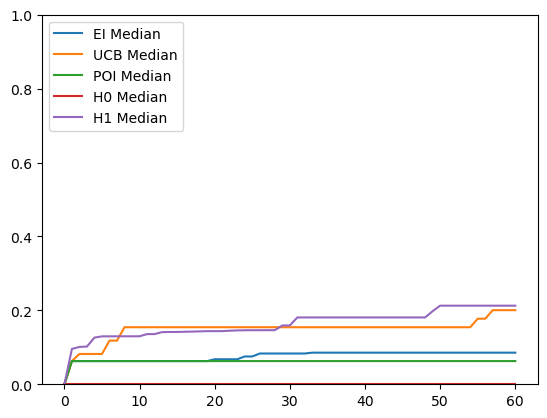

In [48]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    print(testfn)
    myopic_gaps_df = myopic_experiments[testfn]
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    medians = [
        (myopic_gaps_df["ei_gaps"].median(), "EI Median"),
        (myopic_gaps_df["ucb_gaps"].median(), "UCB Median"),
        (myopic_gaps_df["poi_gaps"].median(), "POI Median"),
        (nonmyopic_gaps_df["rollout_h0_gaps"].median(), "H0 Median"),
        (nonmyopic_gaps_df["rollout_h1_gaps"].median(), "H1 Median")
    ]
    [median.plot(label=f"{label}") for median, label in medians]
    plt.legend(loc="upper left")
    plt.ylim(0, 1)
    plt.show()